# **ITS_LIVE** Global Glacier Velocity Exploration and Analysis. <a class="anchor" id="chapter_1"/>
<img title="ITS_LIVE" src="img/header.png" width="50%"/>

Luis Lopez[<sup>1</sup>](#fn1), Alex Gardner[<sup>2</sup>](#fn2), Mark Fahnestock[<sup>3</sup>](#fn3), Ted Scambos[<sup>4</sup>](#fn4), Maria Liukis[<sup>2</sup>](#fn2), Chad Greene[<sup>2</sup>](#fn2), Yang Lei[<sup>5</sup>](#fn5), Joe Kennedy[<sup>3</sup>](#fn3),  Bruce Wallin[<sup>1</sup>](#fn1)
 
[![Binder](https://binder.pangeo.io/badge_logo.svg)](https://binder.pangeo.io/v2/gh/nasa-jpl/itslive-explorer/main?filepath=notebooks/LL_01_ITS_LIVE_global_glacier_velocity_exploration_and_analysis.ipynb)

<span id="fn1" style="font-size: small">1.National Snow and Ice Data Center</span><BR>
<span id="fn2" style="font-size: small">2.NASA Jet Propulsion Laboratory</span><BR>
<span id="fn3" style="font-size: small">3.University of Alaska Fairbanks</span><BR>
<span id="fn4" style="font-size: small">4.University of Colorado Earth Science and Observation Center</span><BR>
<span id="fn5" style="font-size: small">5.California Institute of Technology</span>

## 1.1 Author(s) <a class="anchor" id="section_1_1"/>

- Author1 = {"name": "Luis Lopez", "affiliation": "National Snow and Ice Data Center", "email": "luis.lopez@nsidc.org", "orcid": ""}
- Author2 = {"name": "Alex Gardner", "affiliation": "NASA Jet Propulsion Laboratory", "email": "alex.s.gardner@jpl.nasa.gov", "orcid": "0000-0002-8394-8889"}
- Author3 = {"name": "Mark Fahnestock", "affiliation": "University of Alaska Fairbanks", "email": "mfahnestock@alaska.edu", "orcid": ""}
- Author4 = {"name": "Ted Scambos", "affiliation": "University of Colorado Earth Science and Observation Center", "email": "tascambos@colorado.edu", "orcid": ""}
- Author5 = {"name": "Maria Liukis", "affiliation": "NASA Jet Propulsion Laboratory", "email": "maria.liukis@jpl.nasa.gov", "orcid": ""}
- Author6 = {"name": "Chad Greene", "affiliation": "NASA Jet Propulsion Laboratory", "email": "chad.a.greene@jpl.nasa.gov", "orcid": ""}
- Author7 = {"name": "Yang Lei", "affiliation": "California Institute of Technology", "email": "ylei@caltech.edu", "orcid": ""}
- Author7 = {"name": "Joe Kennedy", "affiliation": "University of Alaska ASF", "email": "jhkennedy@alaska.edu", "orcid": ""}


## Table of Contents

* [1 ITS_LIVE global glacier velocity exploration and analysis.¶](#chapter_1)
    * [1.1 Author(s)](#section_1_1)
    * [1.2 Purpose](#section_1_2)
    * [1.3 Technical contributions](#section_1_3)
    * [1.4 Methodology](#section_1_4)
    * [1.5 Results](#section_1_5)
    * [1.6 Funding](#section_1_6)
    * [1.7 Keywords](#section_1_7)
    * [1.8 Citation](#section_1_8)
    * [1.9 Work In Progress - improvements](#section_1_9)
    * [1.10 Acknowledgements](#section_1_10)
* [2 Setup](#chapter_2)
    * [2.1 Library import](#section_2_1)
    * [2.2  Local library import](#section_2_2)
* [3 Parameter definitions](#chapter_3)
    * [3.1 Search](#section_3_1)
    * [3.2 Tuned Search](#section_3_2)
* [4 Data import](#chapter_4)
    * [4.1 Filtering (before downloading)](#section_4_1)
    * [4.2 Downloading data](#section_4_2)
* [5 Data processing and analysis](#chapter_5)
    * [5.1 Building a data cube](#section_5_1)
    * [5.2 Plotting a time series with xarray](#section_5_2)
* [6 References](#chapter_6)

## 1.2 Purpose <a class="anchor" id="section_1_2"/>

The itslive-explorer notebook allows users to explore and visualize glacier surface velocity at global scale using data produced by NASA's JPL autonomous Repeat Image Feature Tracking algorithm (Gardner et al., 2018).

Because of its high temporal and spatial resolution, ITS_LIVE data amounts to 8+ million NetCDF files (and growing) stored in AWS S3. For the users' convenience, exploration and filtering of this data can be done using an ipyleaflet-based widget that laverages the [ITS_LIVE search API](https://nsidc.org/apps/itslive-search/docs). After relevant data granules for an area (for example a glacier of interest) are downloaded, the notebook provides users with an xarray-powered method to build a data cube ready for time series analysis and from which valuable scientific insights could be gathered.

## 1.3 Technical contributions <a class="anchor" id="section_1_3"/>

* **Demonstration of time series analysis using the ITS_LIVE velocity pairs dataset**
  * The main contribution of the notebook is to provide users with a transparent way to access and process glacier surface velocity data. The notebook uses the ITS_LIVE search API to retrieve a list of granules of interest stored on AWS S3. This can be done using the client library or using an ipyleaflet-based widget. The core example of this notebook creates a time series that enables scientists to work on the science and worry less about the code.
* **Development of underlying search API that is exposed in the notebook**
  * The [ITS_LIVE search API](https://nsidc.org/apps/itslive-search/docs) hosted at NSIDC is a [FastAPI](https://fastapi.tiangolo.com/) application that ingests geojson metadata produced by the AutoRIFT processing pipeline and indexes them using PostGIS.
* **Contributing back to the open source community**
  * Since a considerable number of glaciers are in polar latitudes, visualization of such glacier boundaries get distorted and visual overlaps make it difficult to work with them. ITS_LIVE wanted to give users who are not familiar with APIs and Python a way to get the information to their machine, independently of whether their machine is a laptop or a VM in the cloud. For this reason we **implemented custom map projections** for the **[ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet)** map widget. This way a user can search and download data without the need to code a single line of Python, as some scientist have their own way of processing data (e.g. matlab) 

## 1.4 Methodology <a class="anchor" id="section_1_4"/>

### Data Processing 

ITS_LIVE aims to use a cloud native approach to generate and analyze data. Leveraging the fact that the dataset sources are stored in AWS S3 all the processing occurs on AWS infrastructure using the [hyp3](https://hyp3.asf.alaska.edu/) pipeline developed by the **Alaska Satellite Facility**. A dockerized implementation of AutoRIFT is applied to n number of input files in parallel generating output files which are stored back in S3 along with geojson metadata for each granule.

<img title="ITS_LIVE hyp3 pipeline" src="img/processing-pipeline.png" width="50%"/> <a class="anchor" id="figure_1"/>Fig 1.

 [ITS_LIVE's AutoRIFT algorithm](https://github.com/leiyangleon/autoRIFT) can be applied to optical and radar imagery. Use cases include the measurement of surface displacements occurring between two repeat satellite images as a result of glacier flow, large earthquake displacements, and land slides. Currently we use Landsat optical and Sentinel radar imagery as input sources for glacier velocity extraction.

Image pairs collected from the same satellite position ("same-path-row") are searched if they have a time separation of fewer than 546 days. This approach was used for all satellites in the Landsat series (L4 to L8). To increase data density prior to the launch of Landsat 8, images acquired from differing satellite positions, generally in adjacent or near-adjacent orbit swaths ("cross-path-row"), are also processed if they have a time separation between 10 and 96 days and an acquisition date prior to 14 June 2013(beginning of regular Landsat 8 data). Feature tracking of cross-path-row image pairs produces velocity fields with a lower signal-to-noise ratio due to residual parallax from imperfect terrain correction. Same-path-row and cross-path-row preprocessed pairs of images are searched for matching features by finding local normalized cross-correlation (NCC) maxima at sub-pixel resolution by oversampling the correlation surface by a factor of 16 using a Gaussian kernel. A sparse grid pixel-integer NCC search (1/16 of the density of full search grid) is used to determine areas of coherent correlation between image pairs. For more information, see the Normalized Displacement Coherence (NDC) filter described in Gardner et al. (2018)

Fig 2 shows  vertical and horizontal pixel displacements being correlated to create a final velocity field normalized to meters per year.

<img title="AutoRIFT" src="https://raw.githubusercontent.com/leiyangleon/autoRIFT/master/figures/regular_grid_optical.png" width="50%"/> <a class="anchor" id="figure_2"/>Fig 2.

### ITS_LIVE velocity pair granules

The velocity pair granule is distributed in NetCDF format. 

* Coverage: **All land ice**
* Date range: **1985-present**
* Resolution: **240m**
* Projections: **UTM zones for mid latitudes, EPSG:3031 for Antarctica, and EPSG:3413 for northern latitudes.**
* Scene-pair separation: **6 to 546 days**

<img title="ITS_LIVE hyp3 pipeline" src="img/velocity-granule.png" width="50%"/> <a class="anchor" id="figure_3"/>Fig 3.

### Granule Search and Analysis

The [ITS_LIVE search API](https://nsidc.org/apps/itslive-search/docs) has 2 endpoints to retrieve a list of granules of interest using the OpenAPI specification:

  * `/velocities/coverage/`
    * gets an aggregate by year (a faceted result) of how many granules will be returned given the user's spatiotemporal parameters 
  * `/velocities/urls/`
    * produces a list of S3 file URLs that match the user's spatiotemporal parameters

## 1.5 Results <a class="anchor" id="section_1_5"/>
Describe and comment on the most important results. Include images and URLs as necessary. 

## 1.6 Funding <a class="anchor" id="section_1_6"/>

- Award1 = {"agency": "NASA", "award_code": "# Making Earth System Data Records for Use in Research Environments (MEaSUREs) Program", "award_URL": "https://earthdata.nasa.gov/esds/competitive-programs/measures/its-live"}

## 1.7 Keywords <a class="anchor" id="section_1_7"/>

keywords=["glacier", "surface", "velocity", "dataset", "nasa"]

## 1.8 Citation <a class="anchor" id="section_1_8"/>


## 1.9 Work In Progress - improvements <a class="anchor" id="section_1_9"/>

The current analysis workflow still relies in the dated download and analyze paradigm but the idea is to use Pangeo's way and thus process the granules on a Dask cluster.  A dedicated Dask cluster for our users is out of scope for ITS_LIVE, however it will be very convenient to adapt the current client library and examples to use one.

#### TODOs:
- **On demand cube generation(back-end)**: An intermediate step between the current workflow to analyze the velocity granules locally and in the cloud is to implement the data cube generation on the ITS_LIVE back-end. This way the users will only care about downloading the slice of data they need with the variables they need. This sliced cube could also be generated by Harmony at some point, see point no. 3.
- **Velocity basemap**: the current map widget does not have a basemap that reflects the global velocity mosaics. The trick is to adapt gdal2tiles or something like it to process enough regional maps into a partition that is compatible with NASA GIBS grid definitions(the basemaps used in the widget)
- **Include elevation change datasets**: Velocity is not the only ingredient scientist need in order to analyze glacier movements, elevation change data is also part of ITS_LIVE but is not yet included on the current notebook. Once we have both datasets, more accurate and interesting analyses will be possible e.g. mass balance trends.
- **Harmony integration**: [NASA's Harmony](https://harmony.earthdata.nasa.gov/) is NASA's next generation data processing tool that will allow scientist to get subsetted and analysis ready data in cloud data format. Having ITS_LIVE as a Harmony compatible data will close the  cloud native circle stated earlier.

## 1.10 Acknowledgements <a class="anchor" id="section_1_10"/>

Daniel Tiger and Peppa Pig et al. for entertaining our twin toddlers while finishing this notebook.


# 2. Setup <a class="anchor" id="chapter_2"/>

There are 2 ways of using this notebook, we are going to use code but after all the cells are executed, we want the users to try the same approach with the widget.

## 2.1 Library import <a class="anchor" id="section_2_1"/>

In [1]:
# Code cell No. 1
# data manipulation and plotting.
import xarray as xr

# ITS_LIVE Search client which can be used as a widget or just code.
from SearchWidget import map
from VelocityProcessing import VelocityProcessing as vp
# horizontal=render in notebook. vertical = render in sidecar
m = map(orientation='horizontal')

# 3. Parameter definitions  <a class="anchor" id="chapter_3"/>

ITS_LIVE data com from multiple scenes and satellites, which means a lot of overlap. In this case all the scenes that match with our spatial criteria will be returned. Fig 4 shows overlaps of different Landsat scenes on a given zone.

> **Note**: This notebook was designed to build data cubes on a glacier scale rather than larger areas. we will use Pine Island Glacier for demo purposes.


<img title="ITS_LIVE scene overlaps" src="img/overlaps.png" width="40%"/> <a class="anchor" id="figure_3"/>Fig 4.

### 3.1 Search parameters <a class="anchor" id="section_3_1"/>

* **polygon/bbox**: LON-LAT pairs separated by a comma.
* **start**: YYYY-mm-dd start date
* **end**: YYYY-mm-dd end date
* **min_separation**: minimum days of separation between scenes
* **max_separation**: maximum days of separation between scenes
* **percent_valid_pixels**: % of valid pixel coverage on glaciers
* **serialization**: json,html,text

You can use Python or CURL to get the granules list. The OpenAPI endpoint can also be used to access the data.

https://nsidc.org/apps/itslive-search/docs

or with Curl

```bash
curl -X GET "https://nsidc.org/apps/itslive-search/velocities/urls/?polygon=-68.0712890625%2C-69.77135571628376%2C-65.19287109375%2C-69.77135571628376%2C-65.19287109375%2C-68.19605229820671%2C-68.0712890625%2C-68.19605229820671%2C-68.0712890625%2C-69.77135571628376&start=2000-01-01&end=2020-01-01&percent_valid_pixels=80" -H  "accept: application/json"
```

In [2]:
# Code cell No. 2
# Pine Island Glacier
params = {
    'polygon': '-101.1555,-74.7387,-99.1172,-75.0879,-99.8797,-75.46,-102.425,-74.925,-101.1555,-74.7387',
    'start': '1984-01-01',
    'end': '2020-01-01',
    'percent_valid_pixels': 10,
    'min_separation': 6,
    'max_separation': 180
}

# Search populates the "filtered_urls" variable in our class instance, next we can actually filter this list to limit the number of granules we download.
granule_urls = m.Search(params)
print(f'Total granules found: {len(granule_urls)}')

Querying: https://nsidc.org/apps/itslive-search/velocities/urls/?polygon=-101.1555,-74.7387,-99.1172,-75.0879,-99.8797,-75.46,-102.425,-74.925,-101.1555,-74.7387&start=1984-01-01&end=2020-01-01&percent_valid_pixels=10&min_interval=6&max_interval=180
Total granules found: 4006


### 3.2 Tunning our search <a class="anchor" id="section_3_2"/>

Besides the spatiotemporal parameters, the other important parameter to take into account is `percent_valid_pixels`. Old scenes form the 80s don't have a lot of good quality coverage but are still important so lowering this parameter will return more results, for recent years however maybe too many.

In [3]:
# Code cell No. 3
# Pine Island Glacier with a higher minimum coverage treshold and max separation to 120 days
params = {
    'polygon': '-101.1555,-74.7387,-99.1172,-75.0879,-99.8797,-75.46,-102.425,-74.925,-101.1555,-74.7387',
    'start': '1984-01-01',
    'end': '2020-01-01',
    'percent_valid_pixels': 50,
    'min_separation': 6,
    'max_separation': 120
}

granule_urls = m.Search(params)
print(f'Total granules found: {len(granule_urls)}')

Querying: https://nsidc.org/apps/itslive-search/velocities/urls/?polygon=-101.1555,-74.7387,-99.1172,-75.0879,-99.8797,-75.46,-102.425,-74.925,-101.1555,-74.7387&start=1984-01-01&end=2020-01-01&percent_valid_pixels=50&min_interval=6&max_interval=120
Total granules found: 1161


# 4. Data import  <a class="anchor" id="chapter_4"/>

## 4.1 Data Filtering

More than a thousand granules doesn't seem much but it's not trivial if you only want to get a glance of the behavior of a particular glacier over the years. For this reason we can limit the number of granules per year and download only those with a given month as a middate, this is also useful if a given glacier is affected by seasonal cycles. This should be less of an issue once this procesing is done either on the back-end or using a Dask cluster.

In [4]:
# Code cell No. 4
# filter_urls requires a list of urls, the result is stored in the m.filtered_urls attribute
filtered_granules_by_year = m.filter_urls(granule_urls,
                                          max_files_per_year=10,
                                          months=['November', 'December', 'January'],
                                          by_year=True)

# We print the counts per year
for k in filtered_granules_by_year:
    print(k, len(filtered_granules_by_year[k]))
print(f'Total granules after filtering: {len(m.filtered_urls)}')

1997 1
2001 3
2002 4
2003 1
2007 1
2008 1
2009 2
2010 4
2012 10
2013 10
2014 10
2015 10
2016 10
2017 10
2018 10
2019 10
Total granules after filtering: 97


## 4.2 Downloading data

We have 2 options to download data, we can download filtered urls (by year or as a whole) or we can donload a whole set of URLs returned in our original search.

Single year example:

```python
files = m.download_velocity_granules(urls=filtered_granules_by_year['2006'],
                                     path_prefix='data/pine-glacier-2006',
                                     params=params)
```

The `path_prefix` is the dorectory on which the netcdf files will be downloaded to and `params` is to keep track of which parameters were used to download a particular set of files.

We can also download the whole series

```python
files = m.download_velocity_granules(urls=m.filtered_urls,
                                     path_prefix='data/pine-glacier-1996-2019',
                                     filtered_urls=params)

```

In [5]:
# Code cell No. 5
filtered_urls = m.filtered_urls # or filtered_granules_by_year
project_folder = 'data/pine-1996-2019'

# if we are using our parameters (not the widget) we asign our own dict i.e. params=my_params
files = m.download_velocity_granules(urls=filtered_urls,
                                     path_prefix=project_folder,
                                     params=params)

SUBMITTING | :   0%|          | 0/97 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/97 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/97 [00:00<?, ?it/s]

# 5. Data processing and analysis  <a class="anchor" id="chapter_5"/>

The most common use case for the velocity granules is to generate a time series. In order to create one, we need to concatenate multiple granules from the region of interest for the time we want information from. ITS_LIVE provides a processing module that will load all the velocity granules on a given directory and use a user defined geojson geometry to clip the files so just the data inside the geometry will be used to create the cube.

In [6]:
# Code cell No. 6
# First let's open a single data granule (included in this notebook)
velocity_granule = xr.open_dataset('data/LE07_L1GT_001113_20121118_20161127_01_T2_X_LE07_L1GT_232113_20121104_20161127_01_T2_G0240V01_P059.nc')
velocity_granule

<xarray.Dataset>
Dimensions:              (x: 636, y: 592)
Coordinates:
  * x                    (x) float64 -1.716e+06 -1.716e+06 ... -1.564e+06
  * y                    (y) float64 -2.094e+05 -2.096e+05 ... -3.512e+05
Data variables:
    vx                   (y, x) float32 ...
    vy                   (y, x) float32 ...
    v                    (y, x) float32 ...
    chip_size_width      (y, x) float32 ...
    chip_size_height     (y, x) float32 ...
    interp_mask          (y, x) uint8 ...
    img_pair_info        |S1 ...
    Polar_Stereographic  |S1 ...
Attributes:
    GDAL_AREA_OR_POINT:       Area
    Conventions:              CF-1.6
    date_created:             31-Mar-2020 01:45:13
    title:                    autoRIFT surface velocities
    author:                   Alex S. Gardner, JPL/NASA
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    scene_pair_type:          optical
    motion_detection_method:  feature
    motion_coordinates:       map

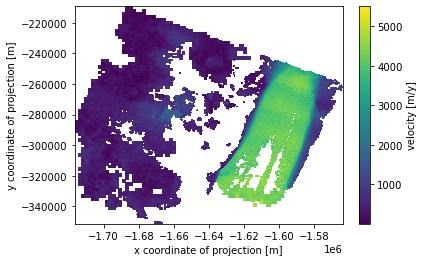

In [7]:
# xarray has built-in methods to plot our variables, in this case the velocity which is the important one in our granules.
velocity_granule.v.plot(x='x', y='y')

## 5.1 Building a data cube <a class="anchor" id="section_5_1"/>

The velocity granules we downloaded won't align perfectly with our geometry of interest, in this case Pine Island Glacier. We need to process these NetCDF files to carv out our region of interest and project them into the same projection(in case some granules are on a different UTM zone) in order to plot and perform our time series analysis. This notebook uses `rio-xarray` to clip and reproject data via the `load_cube` method.

> **Notes**:
>
> 1.The following code cells are intended to work after multiple velocity granules from different years and the same region are downloaded.
>
> 2.`load_cube` is not a lazy function. It will allocate granaules on memory in order to create the cube. This means that if we try to load 100,000 granules the kernel will most likely run out of memory. 

The signature of the `load_cube` method is `load_cube(project_folder, clip_geom=geometry, include_all_projections=False)`

The parameters are:
* **project_folder**: The file path pattern for NetCDF velocity files
* **clip_geom**: gejson geometry dictionary, this geometry will be used to [clip the files](https://corteva.github.io/rioxarray/html/examples/clip_geom.html)
* **include_all_projections**: True or False, if True the cube will include granules on different UTM zones than the most common one for the selected area.

If we don't use the map widget we can also use a handy function to get the geojson polygon from a bounding box

In [8]:
# If we have a list of coordinates or a bbox we can get the correspondant geojson by
# geometry = vp.box_to_geojson([-49.79, 69.06, -48.55, 69.25])
# geometry = vp.polygon_to_geojson([(-48.55, 69.06),(-48.55, 69.25),(-49.79, 69.25),(-49.79, 69.06),(-48.55, 69.06)])

# The load_cube method needs a GeoJSON geometry to clip the region of interest.

geometry = {'type': 'Polygon',
'coordinates': [[[-101.155511, -74.738709],
  [-99.117207, -75.087959],
  [-99.879774, -75.46007],
  [-102.42516, -74.925034],
  [-101.155511, -74.738709]]]}

# if we are using the widget
# geometry = m.get_current_selection()['geometry'] 
geometry

{'type': 'Polygon',
 'coordinates': [[[-101.155511, -74.738709],
   [-99.117207, -75.087959],
   [-99.879774, -75.46007],
   [-102.42516, -74.925034],
   [-101.155511, -74.738709]]]}

In [9]:
%%time
# File pattern for our curent search folder.
project_folder = 'data/pine-1996-2019/*.nc'

cube = vp.load_cube(project_folder,
                    clip_geom=geometry,
                    include_all_projections=True)
cube

CPU times: user 21.4 s, sys: 784 ms, total: 22.1 s
Wall time: 22.2 s


<xarray.Dataset>
Dimensions:              (time: 104, x: 298, y: 400)
Coordinates:
  * x                    (x) float64 -1.636e+06 -1.636e+06 ... -1.565e+06
  * y                    (y) float64 -3.541e+05 -3.539e+05 ... -2.584e+05
  * time                 (time) datetime64[ns] 1997-01-29 ... 2019-01-19
    Polar_Stereographic  int64 0
Data variables:
    vx                   (time, y, x) float32 nan nan nan nan ... nan nan nan
    vy                   (time, y, x) float32 nan nan nan nan ... nan nan nan
    v                    (time, y, x) float32 nan nan nan nan ... nan nan nan
    chip_size_width      (time, y, x) float32 nan nan nan nan ... nan nan nan
    chip_size_height     (time, y, x) float32 nan nan nan nan ... nan nan nan
    interp_mask          (time, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    GDAL_AREA_OR_POINT:       Area
    Conventions:              CF-1.6
    date_created:             31-Mar-2020 04:18:04
    title:                    autoRIFT surface velocities
    author:                   Alex S. Gardner, JPL/NASA
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    scene_pair_type:          optical
    motion_detection_method:  feature
    motion_coordinates:       map
    grid_mapping:             Polar_Stereographic

## 5.2 Plotting a time series with xarray <a class="anchor" id="section_5_2"/>

Once we have our data cube with a time dimension we can use xarray plot capabilities to get a visualization of different time intervals and start using averages, means, media or a custom computation on them. Before we do that we can inspect histograms to discard potential outlier values.



(array([2.79284e+05, 1.10108e+05, 6.96560e+04, 7.49180e+04, 1.45288e+05,
        1.87790e+05, 7.76246e+05, 6.25920e+04, 5.68000e+02, 2.20000e+01]),
 array([1.0000e+00, 6.0040e+02, 1.1998e+03, 1.7992e+03, 2.3986e+03,
        2.9980e+03, 3.5974e+03, 4.1968e+03, 4.7962e+03, 5.3956e+03,
        5.9950e+03], dtype=float32),
 <BarContainer object of 10 artists>)

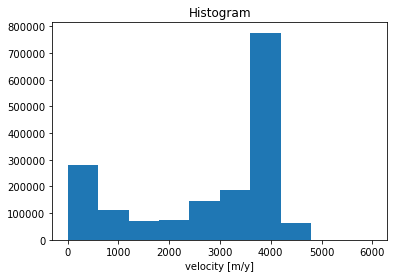

In [10]:
# Histogram of velocities, useful to discard outliers.
cube.v.plot.hist()

Text(0.5, 0.98, 'Pine Island Glacier Yearly Mean Velocity m/y')

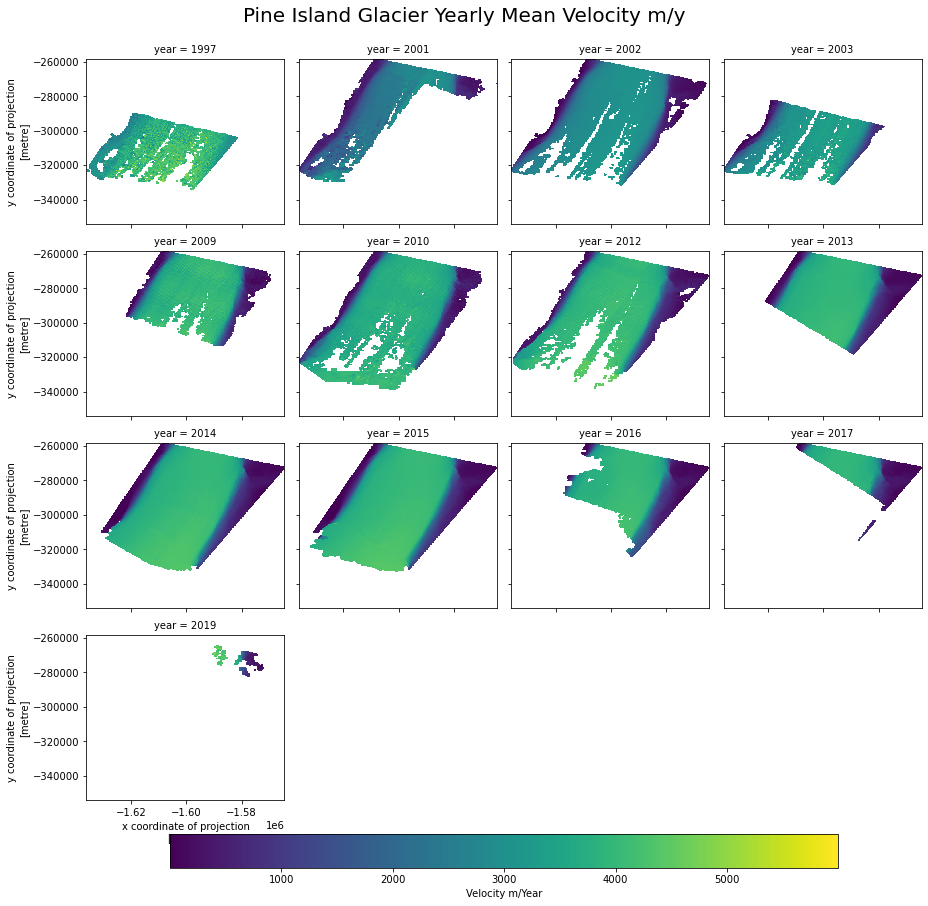

In [11]:
# Now we are going to get anual means for glacier surface velocity, ta dah!
cube_yearly = cube.groupby('time.year').mean()
plot = cube_yearly.v.plot(x='x',
                          y='y',
                          col='year',
                          col_wrap=4,
                          cbar_kwargs=dict(
                              orientation= 'horizontal',
                              shrink=0.8,
                              anchor=(0.5, -0.8),
                              label='Velocity m/Year')
                         )

plot.fig.subplots_adjust(top=0.92)
plot.fig.suptitle("Pine Island Glacier Yearly Mean Velocity m/y",
                  fontsize=20, fontdict={"weight": "bold"})

### Annex: ITS_LIVE search widget

Now that we downloaded and filtered data using the Search API we can use the widget to perform all these steps up to the point of having the granules in a directory of our preference. An idea to turn this widget into an end to end tool would be to use [ipyleaflet-xarray]() to plot the 

In [12]:
m.display()

Output(layout=Layout(border='1px solid black'))

# 6. References <a class="anchor" id="chapter_6"/>
